In [379]:
import numpy as np
import pandas as pd
supervised_gene= pd.read_csv('../data/95_genes.txt',sep='\t',header=None)
print(supervised_gene)

          0
0      ACO1
1     ACSL6
2    ACVR1B
3     AKAP9
4       APC
..      ...
90     TP53
91     TRIO
92    WIPF1
93      WT1
94  ZC3H11A

[95 rows x 1 columns]


In [380]:
high_g = pd.read_csv('../data/highfinal.csv',sep='\t',header=0)
low_g = pd.read_csv('../data/lowfinal.csv',sep='\t',header=0)

In [381]:
high_g.loc[:,'V2'].value_counts()

Stage IV      46
Stage IIIC    41
Stage IVA     17
Stage IIIB    15
Stage III      5
Stage IVB      2
Name: V2, dtype: int64

In [382]:
low_g.loc[:,'V2'].value_counts()

Stage IIA     137
Stage IIIB     45
Stage II       30
Stage III      15
Stage IIB      10
Stage IIIA      8
Stage IIC       1
Name: V2, dtype: int64

In [383]:
low_g.at[low_g.V2.isin(['Stage IIIB','Stage IIA','Stage II',"Stage III","Stage IIIA","Stage IIC","Stage IIB"]),'V2'] = 'Low_stage'
print(low_g)

               V1         V2   V3   V4
0    TCGA-A6-2672  Low_stage   T3   N1
1    TCGA-A6-2678  Low_stage   T3   N1
2    TCGA-A6-4107  Low_stage   T3  N1b
3    TCGA-A6-5657  Low_stage   T3   N1
4    TCGA-A6-5667  Low_stage   T3  N1a
..            ...        ...  ...  ...
241  TCGA-NH-A8F7  Low_stage   T3   N0
242  TCGA-QG-A5YX  Low_stage   T3   N0
243  TCGA-SS-A7HO  Low_stage  T4a   N0
244  TCGA-T9-A92H  Low_stage   T3   N0
245  TCGA-WS-AB45  Low_stage   T3   N0

[246 rows x 4 columns]


In [384]:
high_g.at[high_g.V2.isin(["Stage IV","Stage IVA","Stage IVB","Stage IIIC","Stage III","Stage IIIB"]),'V2'] = 'High_stage'
print(high_g)

               V1          V2   V3   V4
0    TCGA-4N-A93T  High_stage  T4a  N1b
1    TCGA-A6-2677  High_stage   T3   N2
2    TCGA-A6-3807  High_stage   T3   N2
3    TCGA-A6-5660  High_stage   T3  N2b
4    TCGA-A6-5664  High_stage  T4a  N2a
..            ...         ...  ...  ...
121  TCGA-G4-6314  High_stage   T3   N2
122  TCGA-G4-6315  High_stage   T3   N1
123  TCGA-NH-A50U  High_stage  T4a   N0
124  TCGA-NH-A6GC  High_stage  T4b  N1b
125  TCGA-NH-A8F8  High_stage  T4a  N2b

[126 rows x 4 columns]


In [385]:
low_g.loc[:,'V2'].value_counts()

Low_stage    246
Name: V2, dtype: int64

In [386]:
high_g.loc[:,'V2'].value_counts()

High_stage    126
Name: V2, dtype: int64

In [387]:
ga_gene= pd.read_csv('../data/gafinal.csv',sep='\t',header=0)
print(ga_gene)

          samples       APC      BRAF      CTNNB1      EGFR       KRAS  \
0    TCGA-A6-2670  310.4056   97.0018  14851.0582  795.3439  1268.0776   
1    TCGA-A6-2671  256.9659  114.5511  38434.2415  886.8885   664.0867   
2    TCGA-A6-2672  498.0892   84.0764  22588.3439  490.4076   993.6306   
3    TCGA-A6-2674  292.8389  106.1381   7670.0639  347.8261  1566.4962   
4    TCGA-A6-2676  454.5455  123.9669   7406.2102  652.8926   970.4841   
..            ...       ...       ...         ...       ...        ...   
152  TCGA-CM-4747   81.3048   56.9133  14606.4036  209.7663   474.8199   
153  TCGA-CM-4748  612.2449   61.2245  11937.5510  353.2653   591.8367   
154  TCGA-CM-4750  117.1797   61.5690   9301.9861  372.1053   551.1420   
155  TCGA-CM-4752  190.7648   80.1438  13506.1730  343.8169   610.6732   
156  TCGA-CM-5341  120.0466   61.7716  23799.8368  227.2727  1543.1235   

         SMAD2      SMAD4       NRAS    PIK3CA     PIK3R1     MAP2K1  \
0    1005.2910  1085.2381  2393.2981  2

In [388]:
hiseq_gene= pd.read_csv('../data/hiseqfinal.csv',sep='\t',header=0)
print(hiseq_gene)

          samples        APC      BRAF      CTNNB1       EGFR       KRAS  \
0    TCGA-4N-A93T   583.9381   40.6386   6480.8079   432.0029  1250.1209   
1    TCGA-4T-AA8H   701.1515   95.0466   9065.6626   636.7977  1689.6363   
2    TCGA-5M-AAT4   666.0929  132.9604   5181.5060   481.9191   885.5422   
3    TCGA-5M-AAT6   669.3605  136.4970   6640.8963   438.3524  1797.4299   
4    TCGA-5M-AATE   437.9747  129.0584  17263.4748   482.4175   739.3398   
..            ...        ...       ...         ...        ...        ...   
220  TCGA-QG-A5Z1   429.0401  220.4089  11730.3407  1551.5673  1640.7840   
221  TCGA-RU-A8FL   391.9164  134.8774   4806.4805   377.8247   855.1317   
222  TCGA-SS-A7HO   345.5227  160.1415  18678.8847   196.0646   817.2439   
223  TCGA-T9-A92H   257.4674  105.5953   7589.3016   442.9659  1329.4068   
224  TCGA-WS-AB45  1157.7878  220.0521   8346.5479   742.2192  1271.6356   

         SMAD2      SMAD4       NRAS    PIK3CA     PIK3R1     MAP2K1  \
0     876.6328 

In [389]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

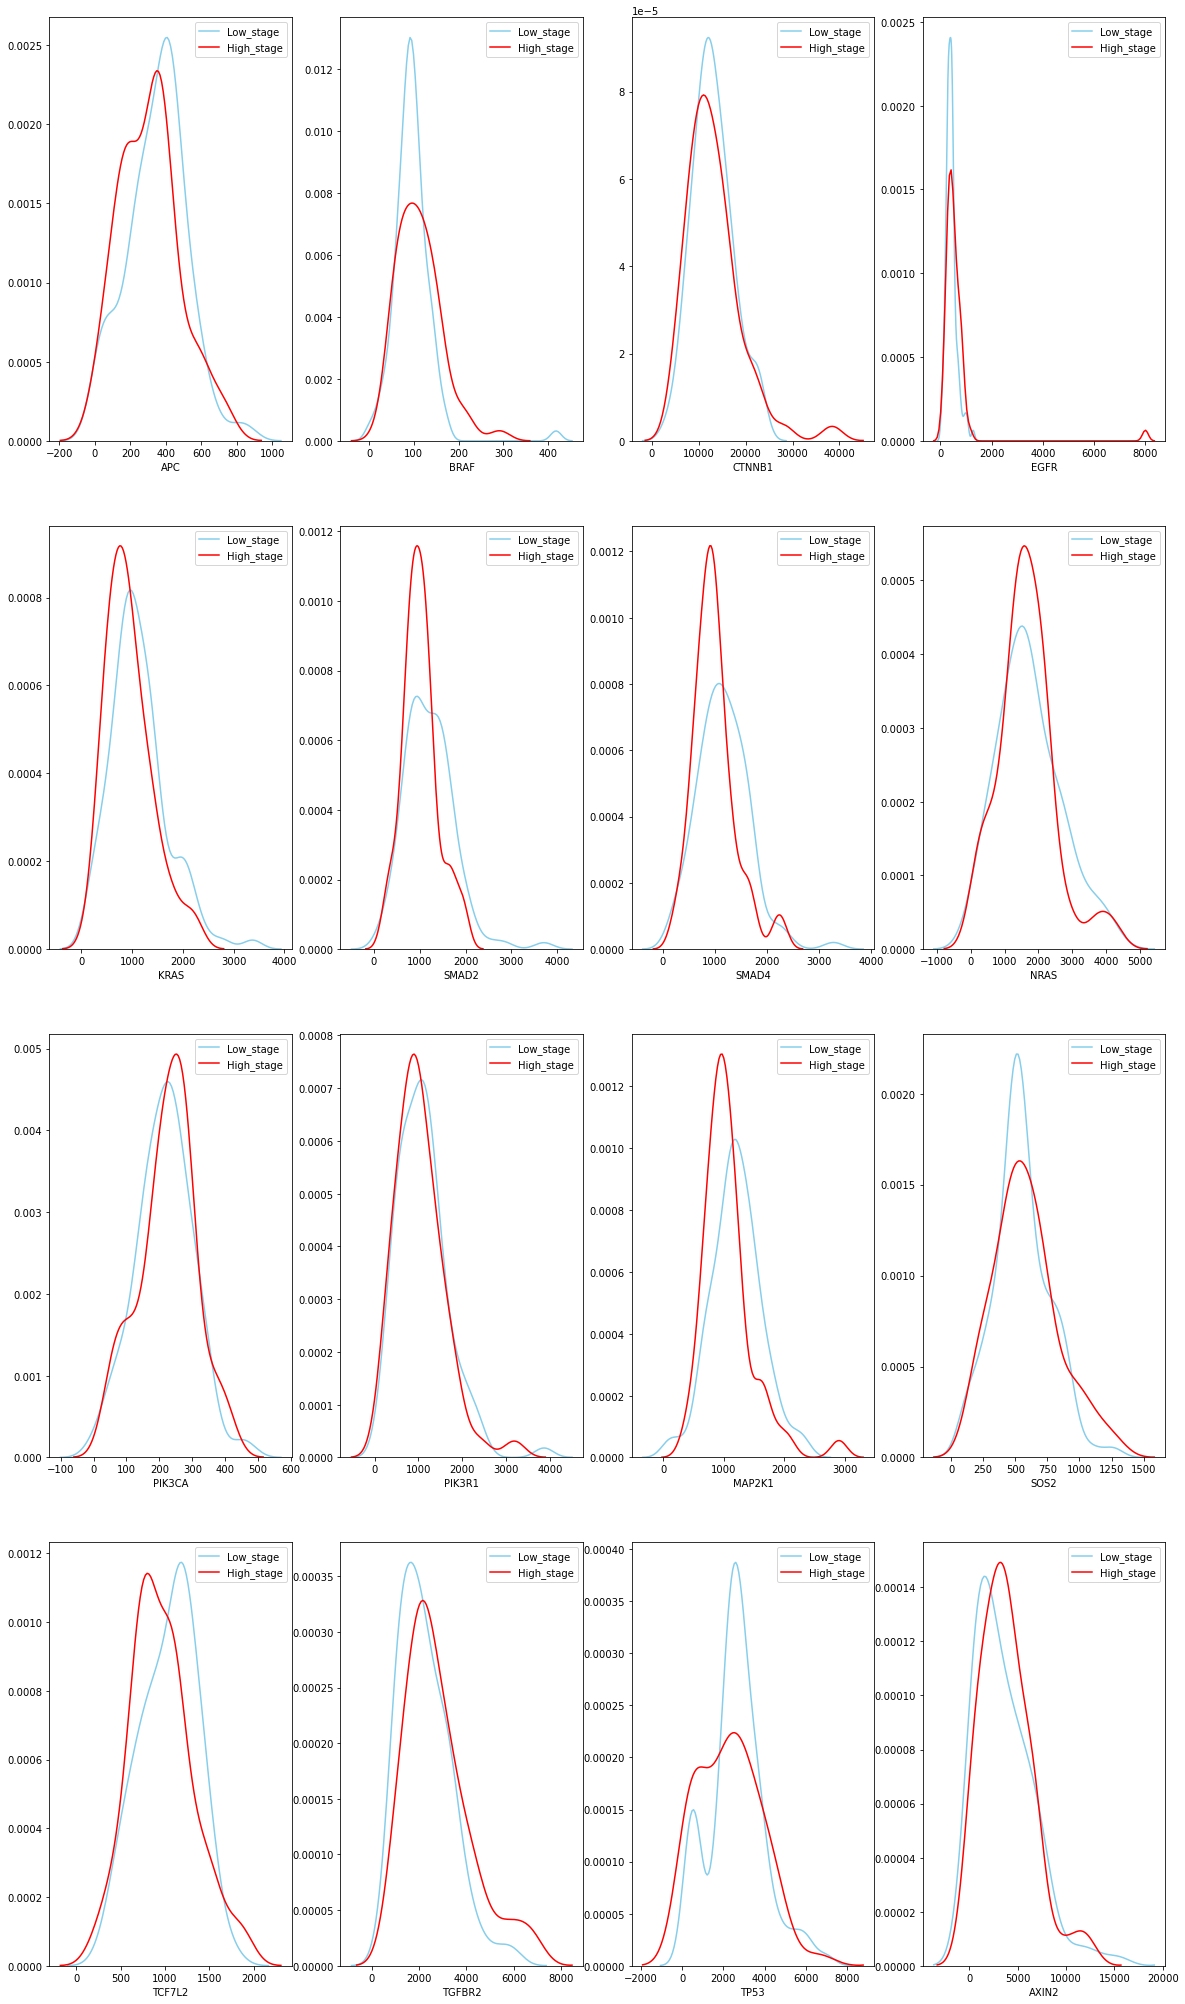

In [390]:
#GA
plt.figure(figsize=(20,120))
for i in range(1,17):
    #print(i)
    plt.subplot(13,4,i)
    sns.distplot(lower_ga.iloc[:,i] , color="skyblue", label="Low_stage",hist=False)
    sns.distplot(higher_ga.iloc[:,i] , color="red", label="High_stage",hist=False)

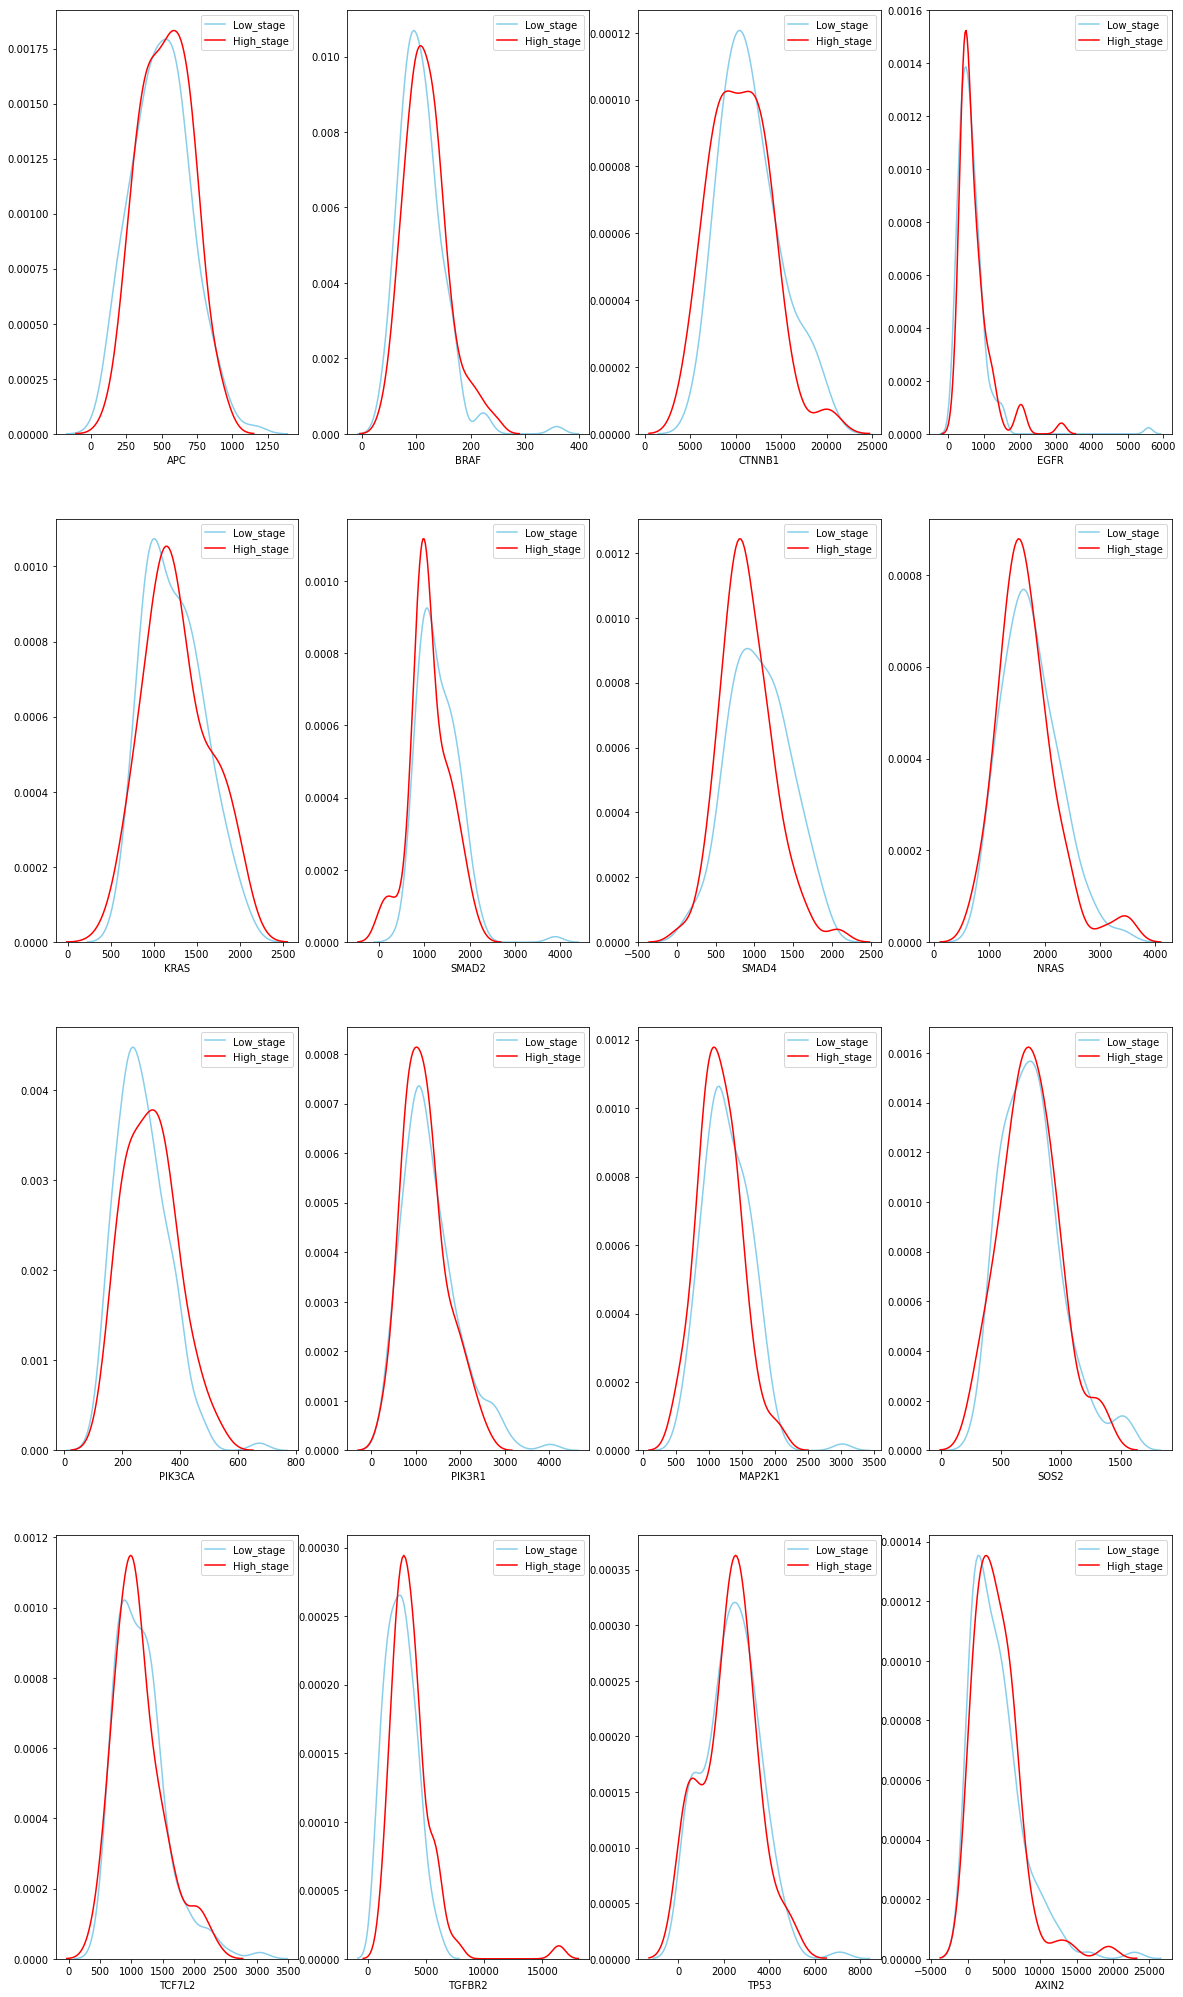

In [391]:

# Hiseq
plt.figure(figsize=(20,120))
for i in range(1,17):
    #print(i)
    plt.subplot(13,4,i)
    sns.distplot( lower_hiseq.iloc[:,i] , color="skyblue", label="Low_stage",hist=False)
    sns.distplot( higher_hiseq.iloc[:,i] , color="red", label="High_stage",hist=False)

In [392]:
# Kruskall Test
from sklearn import datasets
from scipy import stats

In [393]:
ga_gene.loc[:,'V2'].value_counts(dropna=False)

Low_stage     103
High_stage     54
Name: V2, dtype: int64

In [394]:
ga_gene_df = ga_gene[~ga_gene['V2'].isnull()]
lower_ga = ga_gene_df[ga_gene_df['V2'].isin(['Low_stage'])]
higher_ga = ga_gene_df[ga_gene_df['V2'].isin(['High_stage'])]

In [395]:
colum_nm = ga_gene_df.columns[1:-3]
final_test =[]
for col in colum_nm:
    kruskal_test, kruskal_pvalue = stats.mannwhitneyu(lower_ga.loc[:,col],higher_ga.loc[:,col])
    vari_test, levene_pvalue = stats.levene(lower_ga.loc[:,col],higher_ga.loc[:,col],center='mean')
    #ttest_stat, ttest_pvalue = stats.ttest_ind(lower_sp.loc[:,col],higher_sp.loc[:,col])
    final_test.append([col,kruskal_pvalue,levene_pvalue])

In [396]:
final_test_df = pd.DataFrame(final_test,columns=['Gene', 'kruskal_pvalue', 'variance_pval'])
#final_test_df.head()
test_fi_1 = final_test_df[(final_test_df["kruskal_pvalue"] < 0.05)]
test_fi_result = test_fi_1[(test_fi_1["variance_pval"] < 0.05)]
new_selected_gene = test_fi_result.iloc[:,0].array
gene_expression_df = ga_gene_df.loc[:,new_selected_gene]

In [397]:
testgenes =test_fi_1.loc[:,'Gene'] 
print(testgenes)

0        APC
1       BRAF
3       EGFR
4       KRAS
5      SMAD2
6      SMAD4
10    MAP2K1
12    TCF7L2
13    TGFBR2
Name: Gene, dtype: object


In [398]:
gaexpression =ga_gene[['samples','APC','BRAF','EGFR','KRAS','SMAD2','SMAD4','MAP2K1','TCF7L2','TGFBR2']]

In [399]:
#Hiseq
hiseq_gene.loc[:,'V2'].value_counts(dropna=False)

Low_stage     151
High_stage     74
Name: V2, dtype: int64

In [400]:
hiseq_gene_df = hiseq_gene[~hiseq_gene['V2'].isnull()]
lower_hiseq = hiseq_gene_df[hiseq_gene_df['V2'].isin(['Low_stage'])]
higher_hiseq = hiseq_gene_df[hiseq_gene_df['V2'].isin(['High_stage'])]

In [401]:
colum_nm = hiseq_gene_df.columns[1:-3]
final_test =[]
for col in colum_nm:
    kruskal_test, kruskal_pvalue = stats.mannwhitneyu(lower_hiseq.loc[:,col],higher_hiseq.loc[:,col])
    vari_test, levene_pvalue = stats.levene(lower_hiseq.loc[:,col],higher_hiseq.loc[:,col],center='mean')
    #ttest_stat, ttest_pvalue = stats.ttest_ind(lower_sp.loc[:,col],higher_sp.loc[:,col])
    final_test.append([col,kruskal_pvalue,levene_pvalue])

In [402]:
final_test_df = pd.DataFrame(final_test,columns=['Gene', 'kruskal_pvalue', 'variance_pval'])
#final_test_df.head()
test_fi_2= final_test_df[(final_test_df["kruskal_pvalue"] < 0.05)]
test_fi_hiseq = test_fi_2[(test_fi_2["variance_pval"] < 0.05)]
new_selected_gene_hiseq = test_fi_hiseq .iloc[:,0].array
gene_expression_df_hiseq = hiseq_gene_df.loc[:,new_selected_gene_hiseq]

In [403]:
final_test_df

,Gene,kruskal_pvalue,variance_pval
0,APC,0.127127,0.298399
1,BRAF,0.025079,0.981420
2,CTNNB1,0.010456,0.914908
3,EGFR,0.089844,0.397567
4,KRAS,0.271894,0.510392
5,SMAD2,0.003185,0.643722
6,SMAD4,0.000923,0.052728
7,NRAS,0.101307,0.716591
8,PIK3CA,0.013277,0.585769
9,PIK3R1,0.144456,0.071445


In [404]:
hiseqexpression =hiseq_gene[['samples','APC','BRAF','EGFR','KRAS','SMAD2','SMAD4','MAP2K1','TCF7L2','TGFBR2']]

In [405]:
#model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.utils import resample
from collections import Counter
import collections

In [406]:
testga = gaexpression.iloc[:,1:10]
testhiseq = hiseqexpression.iloc[:,1:10]
scaler = StandardScaler(copy=True,with_mean=True, with_std=True) 
rescaledX_train = scaler.fit_transform(testga)
rescaledX_test =scaler.fit_transform(testhiseq)
y_train =ga_gene.loc[:,'V2']
y_test = hiseq_gene.loc[:,'V2']

In [407]:
def FIVE_modles():
    #from sklearn.linear_model import LinearClassifier
    np.random.seed(1)
    from sklearn.tree import DecisionTreeClassifier 
    from sklearn.neighbors import KNeighborsClassifier 
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
        
    ln_clf = LogisticRegression()
    ds_clf = DecisionTreeClassifier()
    knn_clf = KNeighborsClassifier()
    svc_clf = SVC(gamma='auto')
    rf_clf = RandomForestClassifier(n_estimators=100)
    
    for clf in (ln_clf,ds_clf, knn_clf, svc_clf, rf_clf):
        clf.fit(rescaledX_train, y_train)
        y_pred = clf.predict(rescaledX_test)
        print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

In [408]:
FIVE_modles()

LogisticRegression 0.6888888888888889
DecisionTreeClassifier 0.48444444444444446
KNeighborsClassifier 0.6222222222222222
SVC 0.6533333333333333
RandomForestClassifier 0.6577777777777778


In [409]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 
Index=range(0,len(rescaledX_train))


ln_clf = LogisticRegression()
ds_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
svc_clf = SVC(gamma='auto')
rf_clf = RandomForestClassifier(n_estimators=100)

In [410]:
X_test = []
y_test =[]
boot = []
oob =[]
final_acc =[]
def bootstrap_cross_validation(n_split,x_index,df_test,df_outcome):
    #np.random.seed(1)
    scaler = StandardScaler(copy=True,with_mean=True, with_std=True)
    for i in range(n_split):
        boot = resample(x_index, replace=True, n_samples=len(x_index))
    #out of bag observations
        oob = [x for x in x_index if x not in boot]
        X_train = df_test.iloc[boot]
        X_test = df_test.iloc[oob]
        y_train = df_outcome.iloc[boot]
        y_test = df_outcome.iloc[oob]
        rescaledX_train =scaler.fit_transform(X_train)
        rescaledX_test =scaler.fit_transform(X_test)
        print('test ------------------------------------------')
        for clf in (ln_clf,ds_clf, knn_clf, svc_clf, rf_clf):
            
            clf.fit(rescaledX_train, y_train)
            y_pred = clf.predict(rescaledX_test)
            final_acc.append(accuracy_score(y_test, y_pred))
            print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
        
    return final_acc

In [411]:
final_acc = bootstrap_cross_validation(10,Index,testga,y_train)

test ------------------------------------------
LogisticRegression 0.6842105263157895
DecisionTreeClassifier 0.5789473684210527
KNeighborsClassifier 0.7017543859649122
SVC 0.6491228070175439
RandomForestClassifier 0.5263157894736842
test ------------------------------------------
LogisticRegression 0.660377358490566
DecisionTreeClassifier 0.5094339622641509
KNeighborsClassifier 0.7735849056603774
SVC 0.7735849056603774
RandomForestClassifier 0.7169811320754716
test ------------------------------------------
LogisticRegression 0.6290322580645161
DecisionTreeClassifier 0.46774193548387094
KNeighborsClassifier 0.5967741935483871
SVC 0.6290322580645161
RandomForestClassifier 0.6290322580645161
test ------------------------------------------
LogisticRegression 0.7068965517241379
DecisionTreeClassifier 0.4827586206896552
KNeighborsClassifier 0.7241379310344828
SVC 0.6724137931034483
RandomForestClassifier 0.6551724137931034
test ------------------------------------------
LogisticRegression 0

In [412]:
def row_major(alist, sublen):      
    return [alist[i:i+sublen] for i in range(0, len(alist), sublen)]
r_acc =[]
for r in row_major(final_acc, 5): 
    r_acc.append(r)

In [413]:
r_acc = pd.DataFrame(r_acc)
r_acc.describe()


,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.652732,0.550704,0.640448,0.662675,0.618217
std,0.054497,0.063396,0.071647,0.059976,0.056332
min,0.566667,0.467742,0.560606,0.566667,0.526316
25%,0.613140,0.510863,0.586694,0.632488,0.580637
50%,0.646855,0.542262,0.607143,0.657895,0.627016
75%,0.683612,0.577068,0.692982,0.702194,0.649351
max,0.750000,0.650000,0.773585,0.773585,0.716981


In [414]:
# Random search
from sklearn.model_selection import RandomizedSearchCV

In [415]:
print(ln_clf.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [416]:
print(ds_clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [417]:
print(knn_clf.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [418]:
print(svc_clf.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [419]:
print(rf_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [420]:
grid_ln = {"n_jobs": list(range(1,5)),
          "penalty":['l1', 'l2'],
          }

rand =RandomizedSearchCV(ln_clf, grid_ln,cv=5,random_state=1)
rand.fit(rescaledX_train, y_train)
rand.cv_results_
print(rand.best_score_)
print(rand.best_params_)

0.6945564516129034
{'penalty': 'l2', 'n_jobs': 1}


In [421]:
grid_ds =  {'criterion':['gini', 'entropy'],
            "max_depth": np.arange(2, 100, 2),
            'min_samples_leaf' : np.arange(2, 10, 2),
            'min_samples_split': np.arange(2, 20, 2),
            'splitter':['best', 'random']}

rand =RandomizedSearchCV(ds_clf, grid_ds,cv=5,random_state=1)
rand.fit(rescaledX_train, y_train)
rand.cv_results_
print(rand.best_score_)
print(rand.best_params_)

0.6814516129032258
{'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 78, 'criterion': 'gini'}


In [422]:
#knn
grid_knn = {'algorithm':['auto', 'ball_tree','kd_tree','brute'],
            "n_neighbors": list(range(1,10)),
            "leaf_size" :list(range(1,30)),
            "weights":('uniform','distance'),
            "n_jobs": list(range(1,5))}

rand = RandomizedSearchCV(knn_clf, grid_knn,cv=5, n_iter=10, random_state=1)
rand.fit(rescaledX_train, y_train)
rand.cv_results_
print(rand.best_score_)
print(rand.best_params_)

0.6491935483870968
{'weights': 'distance', 'n_neighbors': 3, 'n_jobs': 3, 'leaf_size': 13, 'algorithm': 'auto'}


In [423]:
#svc
grid_svc = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2),
            "kernel" :('rbf','poly','linear')}

rand = RandomizedSearchCV(svc_clf, grid_svc,cv=5, n_iter=10, random_state=1)
rand.fit(rescaledX_train, y_train)
rand.cv_results_
print(rand.best_score_)
print(rand.best_params_)

0.7199596774193548
{'kernel': 'linear', 'gamma': 0.7000000000000001, 'C': 6}


In [424]:
#rf
grid_rf = {"max_depth": np.arange(2, 100, 2),
            'max_features': ['auto', 'sqrt'],
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf' : np.arange(2, 10, 2),
              "bootstrap": [True, False]}

rand = RandomizedSearchCV(rf_clf, grid_rf,cv=5, n_iter=10, random_state=1)
rand.fit(rescaledX_train, y_train)
rand.cv_results_
print(rand.best_score_)
print(rand.best_params_)

0.6302419354838709
{'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 78, 'bootstrap': True}


In [425]:
# Re-validation

In [426]:
X_test = []
y_test =[]
boot = []
oob =[]
final_acc =[]
np.random.seed(1)
scaler = StandardScaler(copy=True,with_mean=True, with_std=True)
ln_clf = LogisticRegression(penalty='l2',n_jobs=1)
ds_clf = DecisionTreeClassifier(splitter='random',min_samples_split= 16, min_samples_leaf= 2, max_depth= 82, criterion='gini')
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors= 3, n_jobs= 3, leaf_size= 13, algorithm= 'auto')
svc_clf = SVC(kernel= 'linear', gamma= 0.1, C= 2)
rf_clf = RandomForestClassifier(min_samples_split= 4, min_samples_leaf= 6, max_features= 'auto', max_depth= 8, bootstrap= True)

def bootstrap_cross_validation(n_split,x_index,df_test,df_outcome):
    #np.random.seed(1)
    scaler = StandardScaler(copy=True,with_mean=True, with_std=True)
    for i in range(n_split):
        boot = resample(x_index, replace=True, n_samples=len(x_index))
    #out of bag observations
        oob = [x for x in x_index if x not in boot]
        X_train = df_test.iloc[boot]
        X_test = df_test.iloc[oob]
        y_train = df_outcome.iloc[boot]
        y_test = df_outcome.iloc[oob]
        rescaledX_train =scaler.fit_transform(X_train)
        rescaledX_test =scaler.fit_transform(X_test)
        print('test ------------------------------------------')
        for clf in (ln_clf,ds_clf, knn_clf, svc_clf, rf_clf):
            
            clf.fit(rescaledX_train, y_train)
            y_pred = clf.predict(rescaledX_test)
            final_acc.append(accuracy_score(y_test, y_pred))
            print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
        
    return final_acc

In [427]:
Index=range(0,len(rescaledX_train))

In [428]:
final_acc = bootstrap_cross_validation(10,Index,testga,y_train)

test ------------------------------------------
LogisticRegression 0.711864406779661
DecisionTreeClassifier 0.4576271186440678
KNeighborsClassifier 0.6271186440677966
SVC 0.6610169491525424
RandomForestClassifier 0.6610169491525424
test ------------------------------------------
LogisticRegression 0.7735849056603774
DecisionTreeClassifier 0.6226415094339622
KNeighborsClassifier 0.6226415094339622
SVC 0.6981132075471698
RandomForestClassifier 0.6792452830188679
test ------------------------------------------
LogisticRegression 0.6428571428571429
DecisionTreeClassifier 0.5714285714285714
KNeighborsClassifier 0.5892857142857143
SVC 0.6785714285714286
RandomForestClassifier 0.5714285714285714
test ------------------------------------------
LogisticRegression 0.6825396825396826
DecisionTreeClassifier 0.6349206349206349
KNeighborsClassifier 0.5555555555555556
SVC 0.7142857142857143
RandomForestClassifier 0.6825396825396826
test ------------------------------------------
LogisticRegression 0.

In [429]:
def row_major(alist, sublen):      
    return [alist[i:i+sublen] for i in range(0, len(alist), sublen)]
r_acc =[]
for r in row_major(final_acc, 5): 
    r_acc.append(r)

In [430]:
r_acc = pd.DataFrame(r_acc)
r_acc.describe()

,0,1,2,3,4
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.662399,0.565813,0.606141,0.662622,0.632257
std,0.060749,0.060598,0.046737,0.056027,0.053485
min,0.573770,0.457627,0.524590,0.557377,0.524590
25%,0.616071,0.524005,0.565354,0.631356,0.607900
50%,0.667047,0.573850,0.624880,0.669794,0.648957
75%,0.699323,0.611049,0.638923,0.695716,0.674688
max,0.773585,0.639344,0.661017,0.750000,0.688525


In [431]:
rescaledX_test =scaler.fit_transform(testhiseq)

In [432]:
def FIVE_validation():
    #from sklearn.linear_model import LinearClassifier
    np.random.seed(1)
    from sklearn.tree import DecisionTreeClassifier 
    from sklearn.neighbors import KNeighborsClassifier 
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
        
    ln_clf = LogisticRegression(penalty='l2',n_jobs=1)
    ds_clf = DecisionTreeClassifier(splitter='random',min_samples_split= 16, min_samples_leaf= 2, max_depth= 82, criterion='gini')
    knn_clf = KNeighborsClassifier(weights='distance', n_neighbors= 3, n_jobs= 3, leaf_size= 13, algorithm= 'auto')
    svc_clf = SVC(kernel= 'linear', gamma= 0.1, C= 2)
    rf_clf = RandomForestClassifier(min_samples_split= 4, min_samples_leaf= 6, max_features= 'auto', max_depth= 8, bootstrap= True)
    for clf in (ln_clf,ds_clf, knn_clf, svc_clf, rf_clf):
        clf.fit(rescaledX_train, y_train)
        y_pred = clf.predict(rescaledX_test)
        print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

In [436]:
Index=range(0,len(rescaledX_test))
rescaledX_train = scaler.fit_transform(testga)
rescaledX_test =scaler.fit_transform(testhiseq)
y_train =ga_gene.loc[:,'V2']
y_test = hiseq_gene.loc[:,'V2']

In [437]:
FIVE_validation()

LogisticRegression 0.6888888888888889
DecisionTreeClassifier 0.5733333333333334
KNeighborsClassifier 0.6533333333333333
SVC 0.6577777777777778
RandomForestClassifier 0.6533333333333333


In [438]:
ln_clf = LogisticRegression(penalty='l2',n_jobs=1)
ds_clf = DecisionTreeClassifier(splitter='random',min_samples_split= 16, min_samples_leaf= 2, max_depth= 82, criterion='gini')
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors= 3, n_jobs= 3, leaf_size= 13, algorithm= 'auto')
svc_clf = SVC(kernel= 'linear', gamma= 0.1, C= 2)
rf_clf = RandomForestClassifier(min_samples_split= 4, min_samples_leaf= 6, max_features= 'auto', max_depth= 8, bootstrap= True)